In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/CS412/Real estate.csv')

In [ ]:
print("Shape of the dataset: ", df.shape)
print("Missing values in dataset: ", df.isnull().sum())

df.tail(5)

Shape of the dataset:  (414, 8)
Missing values in dataset:  No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
y=df[['Y house price of unit area']]
x=df.drop(columns=["Y house price of unit area", "No"])

In [ ]:
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, random_state=1, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, random_state=1, test_size=0.50)

In [ ]:
print('train',X_train.shape, y_train.shape)
print('test',X_test.shape, y_test.shape)
print('val',X_val.shape, y_val.shape)

train (289, 6) (289, 1)
test (62, 6) (62, 1)
val (63, 6) (63, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

first_linear_regression = LinearRegression()
first_linear_regression.fit(X_train , y_train)
y_pred3 = first_linear_regression.predict(X_test)

print('Coefficients: \n', first_linear_regression.coef_)
print('Bias:', first_linear_regression.intercept_)
# The mean absolute error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred3))

Coefficients: 
 [[ 4.12730471e+00 -2.27169419e-01 -4.18081947e-03  1.19484874e+00
   2.22609979e+02 -3.09227717e+00]]
Bias: [-13450.05964328]
Mean squared error: 134.49


[77.10350809954002, 58.300249802707306, 51.530949086500385, 150.70067702660634, 1350.9364141607984]
[65.47969594374742, 41.33401963373371, 31.041228303933714, 21.951943086555488, 22.682275869781105]


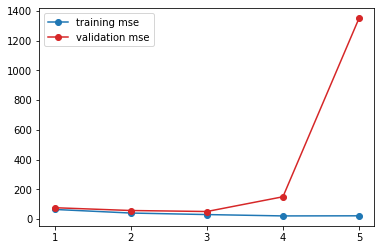

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

mse_train=[]
mse_val=[]
p=[1,2,3,4,5]
for d in p:
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X_train)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y_train)
  y_pred = lin_reg.predict(X_poly)

  m=mean_squared_error(y_train,y_pred)
  mse_train.append(m)

  X_poly = poly_reg.fit_transform(X_val)
  #lin_reg.fit(X_poly2, y_val)
  y_pred = lin_reg.predict(X_poly)

  m2=mean_squared_error(y_val,y_pred)
  mse_val.append(m2)

print(mse_val)
print(mse_train)

plt.figure(0)
plt.plot(p, mse_train, 'tab:blue', label='training mse', marker="o")
plt.plot(p, mse_val,'tab:red', label='validation mse', marker="o")

plt.xticks(p,p)
plt.legend()
plt.show()

The optimal value of p is 3. We can see in the plot that validation data gave the smallest MSE with 3. Since we should evaluate on the validation data when we try to decide on hyperparameter values, we go with 3.


In [ ]:
df.cov()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,14317.500000,-1.641671,-44.723245,-2.049851e+03,-4.475787,-0.015012,-0.020309,-46.542615
X1 transaction date,-1.641671,0.079506,0.056372,2.166557e+01,0.008003,0.000123,-0.000178,0.335665
X2 house age,-44.723245,0.056372,129.788704,3.684082e+02,1.664189,0.007694,-0.008483,-32.640356
X3 distance to the nearest MRT station,-2049.850694,21.665566,368.408249,1.592921e+06,-2239.938319,-9.257892,-15.618216,-11567.871845
X4 number of convenience stores,-4.475787,0.008003,1.664189,-2.239938e+03,8.676334,0.016236,0.020302,22.885163
X5 latitude,-0.015012,0.000123,0.007694,-9.257892e+00,0.016236,0.000154,0.000079,0.092249
X6 longitude,-0.020309,-0.000178,-0.008483,-1.561822e+01,0.020302,0.000079,0.000236,0.109273
Y house price of unit area,-46.542615,0.335665,-32.640356,-1.156787e+04,22.885163,0.092249,0.109273,185.136507


[51.530949086500385, 66.34662789084878, 73.47610261554962, 80.4534095116009]
[31.041228303933714, 41.37737074201886, 56.6039934095124, 53.721567790873316]


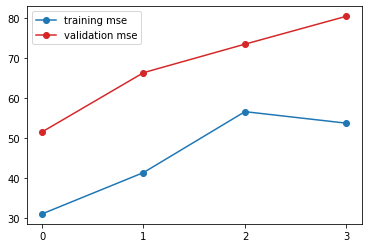

In [ ]:
mse_train=[]
mse_val=[]
d=[0,1,2,3]
for discard in d:
  if discard==0:
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)
    m=mean_squared_error(y_train,y_pred)
    mse_train.append(m)

    X_poly = poly_reg.fit_transform(X_val)
  #lin_reg.fit(X_poly2, y_val)
    y_pred = lin_reg.predict(X_poly)

    m2=mean_squared_error(y_val,y_pred)
    mse_val.append(m2)
  elif discard==1:
    X_train1=X_train.drop(columns=["X5 latitude"])
    X_val1=X_val.drop(columns=["X5 latitude"])

    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X_train1)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)

    m=mean_squared_error(y_train,y_pred)
    mse_train.append(m)

    X_poly = poly_reg.fit_transform(X_val1)
  #lin_reg.fit(X_poly2, y_val)
    y_pred = lin_reg.predict(X_poly)

    m2=mean_squared_error(y_val,y_pred)
    mse_val.append(m2)
  elif discard==2:
    X_train2=X_train.drop(columns=["X5 latitude","X6 longitude"])
    X_val2=X_val.drop(columns=["X5 latitude","X6 longitude"])

    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X_train2)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)

    m=mean_squared_error(y_train,y_pred)
    mse_train.append(m)

    X_poly = poly_reg.fit_transform(X_val2)
  #lin_reg.fit(X_poly2, y_val)
    y_pred = lin_reg.predict(X_poly)

    m2=mean_squared_error(y_val,y_pred)
    mse_val.append(m2)
  else:
    X_train3=X_train.drop(columns=["X5 latitude","X6 longitude","X1 transaction date"])
    X_val3=X_val.drop(columns=["X5 latitude","X6 longitude","X1 transaction date"])

    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X_train3)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(X_poly)

    m=mean_squared_error(y_train,y_pred)
    mse_train.append(m)

    X_poly = poly_reg.fit_transform(X_val3)
  #lin_reg.fit(X_poly2, y_val)
    y_pred = lin_reg.predict(X_poly)

    m2=mean_squared_error(y_val,y_pred)
    mse_val.append(m2)
  

print(mse_val)
print(mse_train)

plt.figure(0)
plt.plot(d, mse_train, 'tab:blue', label='training mse', marker="o")
plt.plot(d, mse_val,'tab:red', label='validation mse', marker="o")

plt.xticks(d,d)
plt.legend()
plt.show()

In [ ]:
X_poly = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_poly)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE on test data:",test_mse)


MSE on test data: 115.1047654166244


Not discarding any of the values meaning d=0 is the best option since MSE is the smallest for both training and validation sets as it can be seen on the figure. While we were trying to discard values, we chose the ones with covariance near to 0 o the Y column. 

Our problem was to predict house price of the unit area given 6 features. We have tried some hyperparameters with the Polinomial Regression model in order to get the least erroreous results. 
I have checked the shape and the null values of the dataset, there were no null values so I did not handle them. I splitted data into features and the target. I have splitted the data into train, val, test for both features and target with 70/15/15 ratio. The model which gave the smallest error is Polinomial Regression with degree 3 when no features are discarded (d=0).
We have obtained the best results with the Polynomial Regression(parameters:degree=3), giving MSE of 115.10 on test data.

*****************************************************************************
FEEDBACK: You should have use the covariance matrix for tuning d. (-5pts).